# Tugas Kolaborasi Peramalan Air Passangers

1. Dio Adya Wicaksono 200411100066
2. Dimas Mahardika 200411100093

In [65]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [67]:
import pandas as pd
import numpy as n

data = pd.read_csv('AirPassengers.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [68]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Month'>

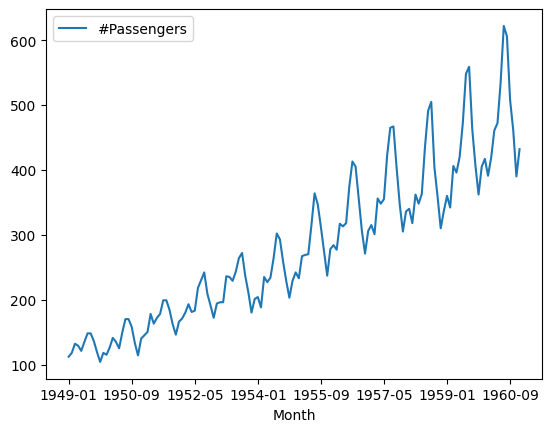

In [69]:
import matplotlib as plt
data.plot(x='Month', y='#Passengers')

In [70]:
data.shape

(144, 2)

In [71]:
from array import array
import numpy as np

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [72]:
# define input sequence from airlinespassengers.csv
df = pd.read_csv('AirPassengers.csv')
series = df['#Passengers']
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(series, n_steps)

# show each sample
for i in range(len(X)):
    print(X[i], y[i])

[112 118 132] 129
[118 132 129] 121
[132 129 121] 135
[129 121 135] 148
[121 135 148] 148
[135 148 148] 136
[148 148 136] 119
[148 136 119] 104
[136 119 104] 118
[119 104 118] 115
[104 118 115] 126
[118 115 126] 141
[115 126 141] 135
[126 141 135] 125
[141 135 125] 149
[135 125 149] 170
[125 149 170] 170
[149 170 170] 158
[170 170 158] 133
[170 158 133] 114
[158 133 114] 140
[133 114 140] 145
[114 140 145] 150
[140 145 150] 178
[145 150 178] 163
[150 178 163] 172
[178 163 172] 178
[163 172 178] 199
[172 178 199] 199
[178 199 199] 184
[199 199 184] 162
[199 184 162] 146
[184 162 146] 166
[162 146 166] 171
[146 166 171] 180
[166 171 180] 193
[171 180 193] 181
[180 193 181] 183
[193 181 183] 218
[181 183 218] 230
[183 218 230] 242
[218 230 242] 209
[230 242 209] 191
[242 209 191] 172
[209 191 172] 194
[191 172 194] 196
[172 194 196] 196
[194 196 196] 236
[196 196 236] 235
[196 236 235] 229
[236 235 229] 243
[235 229 243] 264
[229 243 264] 272
[243 264 272] 237
[264 272 237] 211
[272 237 2

In [73]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [74]:
# prepoceesing data dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

X

array([[0.01544402, 0.02702703, 0.05405405],
       [0.02702703, 0.05405405, 0.04826255],
       [0.05405405, 0.04826255, 0.03281853],
       [0.04826255, 0.03281853, 0.05984556],
       [0.03281853, 0.05984556, 0.08494208],
       [0.05984556, 0.08494208, 0.08494208],
       [0.08494208, 0.08494208, 0.06177606],
       [0.08494208, 0.06177606, 0.02895753],
       [0.06177606, 0.02895753, 0.        ],
       [0.02895753, 0.        , 0.02702703],
       [0.        , 0.02702703, 0.02123552],
       [0.02702703, 0.02123552, 0.04247104],
       [0.02123552, 0.04247104, 0.07142857],
       [0.04247104, 0.07142857, 0.05984556],
       [0.07142857, 0.05984556, 0.04054054],
       [0.05984556, 0.04054054, 0.08687259],
       [0.04054054, 0.08687259, 0.12741313],
       [0.08687259, 0.12741313, 0.12741313],
       [0.12741313, 0.12741313, 0.1042471 ],
       [0.12741313, 0.1042471 , 0.05598456],
       [0.1042471 , 0.05598456, 0.01930502],
       [0.05598456, 0.01930502, 0.06949807],
       [0.

In [75]:
# split data train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=False, test_size=0.2)

# tampilkan shape train dan test
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(112, 3) (112,)
(29, 3) (29,)


In [76]:
# buat model knn regressor
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=11)

# train model
model.fit(X_train, y_train)

# evaluasi model
evaluasi = model.score(X_test, y_test)
print('Hasil Evaluasi :',evaluasi)

# prediksi data test
y_pred = model.predict(X_test)
print('Hasil prediksi :',y_pred)

Hasil Evaluasi : -0.21856824443418832
Hasil prediksi : [405.45454545 400.18181818 380.18181818 356.36363636 326.72727273
 351.90909091 360.18181818 354.81818182 396.09090909 397.81818182
 400.18181818 400.18181818 400.18181818 400.18181818 386.45454545
 380.18181818 356.36363636 388.18181818 402.27272727 400.18181818
 400.18181818 400.18181818 400.18181818 400.18181818 400.18181818
 400.18181818 386.45454545 380.18181818 376.27272727]


In [77]:
# MAPE
from sklearn.metrics import mean_absolute_percentage_error
y_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
print('Hasil MAPE KNN :',mape)

Hasil MAPE KNN : 0.1264188499370808


In [78]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Hasil RMSE KNN :',rmse)

Hasil RMSE KNN : 86.24811610731226


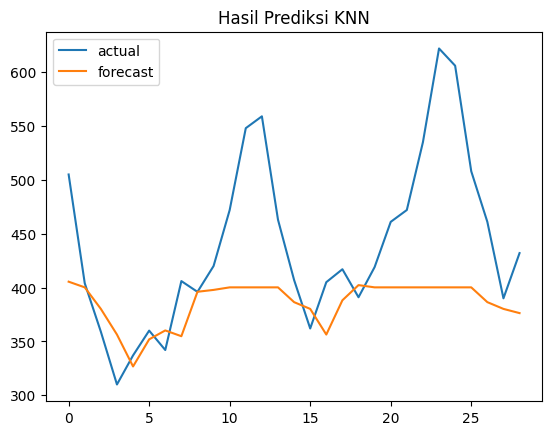

In [79]:
# plot MAPE
import matplotlib.pyplot as plt
plt.title('Hasil Prediksi KNN')
plt.plot(y_test, label='actual')
plt.plot(y_pred, label='forecast')
plt.legend()
plt.show()

# Pemodelan Naive Baiyess

In [80]:
# buat model naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# train model
model.fit(X_train, y_train)

y_baru = model.predict(X_test)

from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_baru)
print('Hasil Mape Naive Bayes:',mape)

Hasil Mape Naive Bayes: 0.21964368063375433


In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_baru))
print('Hasil RMSE',rmse)

Hasil RMSE 135.9586651180779


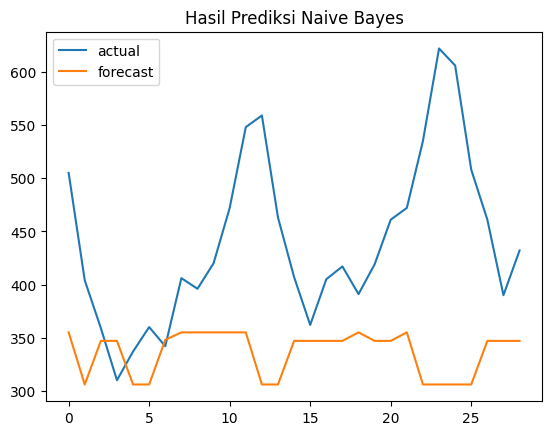

In [82]:
# plot MAPE
import matplotlib.pyplot as plt
plt.title('Hasil Prediksi Naive Bayes')
plt.plot(y_test, label='actual')
plt.plot(y_baru, label='forecast')
plt.legend()
plt.show()